# Tutorial Notebook

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import be_scan
# can also import like: 
#    from be_scan.plot import plot_scatterplot

In [2]:
plot_dir = '../../../tests/test_data/plot_data/'
sgrna_dir = '../../../tests/test_data/sgrna_data/'

Note: all annotate_guides.csv needs information about type of mutation (Missense, Silent, Nonsense, No_A/Exon, Control) and where the edit is along the gene (integer)

## Function Calls

### be_scan.sgrna

#### Function 1 be_scan.sgrna.generate_BE_guides()

In [10]:
from be_scan.sgrna import generate_BE_guides

guides = generate_BE_guides(gene_filepath  = sgrna_dir + "230408_AR_Input.fasta", # filepath to gene .fasta
                            cas_type       = "SpG", 
                            edit_from      = "C", 
                            edit_to        = "T",
                            gene_name      = "AR", 
                            exclude_introns= False, # include guides that only target introns
                            )
print(guides.shape[0], 'guides were generated')
guides.head(3) # display first 3 rows

Create gene object from ../../../tests/test_data/sgrna_data/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful
Guides generated and duplicates removed
1324 guides were generated


,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene
0,gattcagccaagctcaaggA,TGG,2,-19,67545128,0,gattcagccaagctcaaggA,sense,plus,AR
1,attcagccaagctcaaggAT,GGA,0,-18,67545129,0,attcagccaagctcaaggAT,sense,plus,AR
2,cagccaagctcaaggATGGA,AGT,0,-15,67545132,0,cagccaagctcaaggATGGA,sense,plus,AR


#### Function 2 be_scan.sgrna.check_guides()

In [11]:
from be_scan.sgrna import check_guides
# this function takes about a minute to run independent of library size
# this step is not necessary and can be skipped
checked_guides = check_guides(guides_file  = "guides.csv", # file generated from previous step
                              ### this is the path to a reference genome i downloaded locally
                              genome_file  = "../../../../reference_genomes/GCF_000001405.26/ncbi_dataset/data/GCF_000001405.26/GCF_000001405.26_GRCh38_genomic.fna", # reference genome
                              )
checked_guides.head(3) # display first 3 rows

40116757 lines processed from ../../../../reference_genomes/GCF_000001405.26/ncbi_dataset/data/GCF_000001405.26/GCF_000001405.26_GRCh38_genomic.fna
3 guides out of 1324 guides occurred more than once in the reference genome
Guides checked against reference genome


,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,genome_occurrences
0,gattcagccaagctcaaggA,TGG,2,-19,67545128,0,gattcagccaagctcaaggA,sense,plus,AR,0
1,attcagccaagctcaaggAT,GGA,0,-18,67545129,0,attcagccaagctcaaggAT,sense,plus,AR,0
2,cagccaagctcaaggATGGA,AGT,0,-15,67545132,0,cagccaagctcaaggATGGA,sense,plus,AR,0


#### Function 3 be_scan.sgrna.annotate_guides()

In [6]:
from be_scan.sgrna import annotate_guides
annotated_guides = annotate_guides(guides_file    ="filtered.csv",
                                   gene_filepath  ="", # this can be left empty if guides are already annotated
                                   edit_from      ="C",
                                   edit_to        ="T",
                                   protein_filepath = sgrna_dir + "P10275.fasta", 
                                   )
annotated_guides.head(3) # display first 3 rows

Guides annotated


,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,...,CtoT_editing_window,CtoT_win_overlap,C_count,CtoT_target_CDS,CtoT_codon_window,CtoT_residue_window,CtoT_edit_site,CtoT_mutations,CtoT_muttypes,CtoT_muttype
0,AAGTGCAGTTAGGGCTGGGA,AGG,1,4,67545151,0,AAGTGCAGTTAGGGCTGGGA,sense,plus,AR,...,"(7, 11)",Exon,1,TGCAG,GTGCAGTTA,VQL,3.0,[Q4.],[Nonsense],Nonsense
1,AGTGCAGTTAGGGCTGGGAA,GGG,2,5,67545152,0,AGTGCAGTTAGGGCTGGGAA,sense,plus,AR,...,"(8, 12)",Exon,1,GCAGT,GTGCAGTTA,VQL,3.0,[Q4.],[Nonsense],Nonsense
2,GTGCAGTTAGGGCTGGGAAG,GGT,0,6,67545153,0,GTGCAGTTAGGGCTGGGAAG,sense,plus,AR,...,"(9, 13)",Exon,1,CAGTT,CAGTTAGGG,QLG,3.0,[Q4.],[Nonsense],Nonsense
3,AAGGGTCTACCCTCGGCCGC,CGT,2,23,67545170,0,AAGGGTCTACCCTCGGCCGC,sense,plus,AR,...,"(26, 30)",Exon,1,GGTCT,AGGGTCTAC,RVY,9.0,[],[Silent],Silent
4,CTACCCTCGGCCGCCGTCCA,AGA,2,29,67545176,0,CTACCCTCGGCCGCCGTCCA,sense,plus,AR,...,"(32, 36)",Exon,4,CCCTC,TACCCTCGG,YPR,11.0,"[R13W, P12L, P12L/R13W, P12S, P12S/R13W, P12F,...","[Missense, Silent]",Mixed


#### Function 1-3 Combined be_scan.sgrna.guides()

In [13]:
from be_scan.sgrna import guides
guides = guides(gene_filepath = sgrna_dir + "230408_AR_Input.fasta", 
                genome_file  = "../../../../reference_genomes/GCF_000001405.26/ncbi_dataset/data/GCF_000001405.26/GCF_000001405.26_GRCh38_genomic.fna",
                protein_filepath = sgrna_dir + "P10275.fasta", 
                cas_type      = "SpG", 
                edit_from     = "A", 
                edit_to       = "G",
                gene_name     = "AR", 
                exclude_introns= False, 
                )
guides.head(3) # display first 3 rows

Create gene object from ../../../tests/test_data/sgrna_data/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful
Guides generated and duplicates removed
40116757 lines processed from ../../../../reference_genomes/GCF_000001405.26/ncbi_dataset/data/GCF_000001405.26/GCF_000001405.26_GRCh38_genomic.fna
3 guides out of 1108 guides occurred more than once in the reference genome
Guides checked against reference genome
Guides annotated
Complete! Library generated from ../../../tests/test_data/sgrna_data/230408_AR_Input.fasta


,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,...,AtoG_editing_window,AtoG_win_overlap,A_count,AtoG_target_CDS,AtoG_codon_window,AtoG_residue_window,AtoG_edit_site,AtoG_mutations,AtoG_muttypes,AtoG_muttype
0,gattcagccaagctcaaggA,TGG,2,-19,67545128,0,gattcagccaagctcaaggA,sense,plus,AR,...,"(-16, -12)",Intron,0,tcagc,attcagcca,___,-5.0,[],[],Mixed
1,attcagccaagctcaaggAT,GGA,0,-18,67545129,0,attcagccaagctcaaggAT,sense,plus,AR,...,"(-15, -11)",Intron,0,cagcc,cagccaagc,___,-5.0,[],[],Mixed
2,cagccaagctcaaggATGGA,AGT,0,-15,67545132,0,cagccaagctcaaggATGGA,sense,plus,AR,...,"(-12, -8)",Intron,0,ccaag,ccaagctca,___,-4.0,[],[],Mixed


#### Supplemental Function: be_scan.sgrna.add_guide_df()

In [14]:
from be_scan.sgrna import add_guide_df
control_add_guides = add_guide_df(guides_df_filepath     = sgrna_dir+'ARSpGCBE_annotated_guides.csv',
                                  additional_df_filepath = sgrna_dir+'control_lib.csv',
                                  )
control_add_guides.head(3) # display first 3 rows

,sgRNA_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,genome_occurrences,editing_window,win_overlap,C_count,target_CDS,codon_window,residue_window,edit_site,mutations,muttypes,muttype
0,AAGTGCAGTTAGGGCTGGGAAGG,1.0,4.0,67545151.0,0.0,AAGTGCAGTTAGGGCTGGGAAGG,sense,plus,AR,1.0,"(7, 11)",Exon,1.0,TGCAG,GTGCAGTTA,VQL,3.0,['Q4.'],['Nonsense'],Nonsense
1,AGTGCAGTTAGGGCTGGGAAGGG,2.0,5.0,67545152.0,0.0,AGTGCAGTTAGGGCTGGGAAGGG,sense,plus,AR,1.0,"(8, 12)",Exon,1.0,GCAGT,GTGCAGTTA,VQL,3.0,['Q4.'],['Nonsense'],Nonsense
2,GTGCAGTTAGGGCTGGGAAGGGT,0.0,6.0,67545153.0,0.0,GTGCAGTTAGGGCTGGGAAGGGT,sense,plus,AR,1.0,"(9, 13)",Exon,1.0,CAGTT,CAGTTAGGG,QLG,3.0,['Q4.'],['Nonsense'],Nonsense


#### Supplemental Function: be_scan.sgrna.merge_guide_df()

In [15]:
from be_scan.sgrna import merge_guide_df
merged_guides = merge_guide_df(guide_df1_filepath=sgrna_dir+'ARSpGCBE_annotated_guides.csv', 
                               guide_df2_filepath=sgrna_dir+'ARSpGABE_annotated_guides.csv', 
                               )
merged_guides.head(3) # display first 3 rows

,sgRNA_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,genome_occurrences,...,win_overlap,C_count,target_CDS,codon_window,residue_window,edit_site,mutations,muttypes,muttype,A_count
3,AAGGGTCTACCCTCGGCCGCCGT,2,23,67545170,0,AAGGGTCTACCCTCGGCCGCCGT,sense,plus,AR,1,...,Exon,1.0,GGTCT,AGGGTCTAC,RVY,9.0,[''],['Silent'],Silent,NaN
4,CTACCCTCGGCCGCCGTCCAAGA,2,29,67545176,0,CTACCCTCGGCCGCCGTCCAAGA,sense,plus,AR,1,...,Exon,4.0,CCCTC,TACCCTCGG,YPR,11.0,"['R13W', 'P12L', 'P12L/R13W', 'P12S', 'P12S/R1...","['Missense', 'Silent']",Mixed,NaN
5,GGCCGCCGTCCAAGACCTACCGA,1,37,67545184,0,GGCCGCCGTCCAAGACCTACCGA,sense,plus,AR,1,...,Exon,3.0,CGCCG,CCGCCGTCC,PPS,14.0,"['P15L', 'P15S', 'P15L', 'P14L', 'P14L/P15L', ...",['Missense'],Missense,NaN


#### Supplemental Function: be_scan.sgrna.annotate_guides() for unannotated dataframes

In [17]:
from be_scan.sgrna import annotate_guides
annotated_guides = annotate_guides(guides_file    = sgrna_dir+'ARSpGCBE_guides_clipped.csv',
                                   gene_filepath  = sgrna_dir+'230408_AR_Input.fasta',
                                   edit_from      ="C",
                                   edit_to        ="T",
                                   protein_filepath = sgrna_dir + "P10275.fasta", 
                                   )
annotated_guides.head(3)

Warning starting_frame not found
Warning sgRNA_strand not found. No information about direction (sense, antisense).
The guide TGCCTGgtaaggaaaagggaagt match sense and antisense strands.
The guide TGCAGCCTgtaagcaaacgatgg has many occurrences.
The guide GCAGCCTgtaagcaaacgatgga match sense and antisense strands.
The guide AGCCTgtaagcaaacgatggagg match sense and antisense strands.
The guide AAGCctggagaagaagaggcaga match sense and antisense strands.
The guide CGGAAGCctggagaagaagaggc match sense and antisense strands.
Guides annotated


,sgRNA_seq,gene,gene_pos,starting_frame,sgRNA_strand,coding_seq,CtoT_editing_window,CtoT_win_overlap,C_count,CtoT_target_CDS,CtoT_codon_window,CtoT_residue_window,CtoT_edit_site,CtoT_mutations,CtoT_muttypes,CtoT_muttype
0,AAGTGCAGTTAGGGCTGGGAAGG,AR,4,1,sense,AAGTGCAGTTAGGGCTGGGAAGG,"(7, 11)",Exon,1,TGCAG,GTGCAGTTA,VQL,3.0,[Q4.],[Nonsense],Nonsense
1,AGTGCAGTTAGGGCTGGGAAGGG,AR,5,2,sense,AGTGCAGTTAGGGCTGGGAAGGG,"(8, 12)",Exon,1,GCAGT,GTGCAGTTA,VQL,3.0,[Q4.],[Nonsense],Nonsense
2,GTGCAGTTAGGGCTGGGAAGGGT,AR,6,0,sense,GTGCAGTTAGGGCTGGGAAGGGT,"(9, 13)",Exon,1,CAGTT,CAGTTAGGG,QLG,3.0,[Q4.],[Nonsense],Nonsense


#### Supplemental Function: be_scan.sgrna.annotate_guides() for dual editor

In [19]:
from be_scan.sgrna import annotate_guides
annotated_guides = annotate_guides(guides_file    = 'guides.csv',
                                   gene_filepath  = sgrna_dir+'230408_AR_Input.fasta',
                                   edit_from      ="CA",
                                   edit_to        ="TG",
                                   protein_filepath = sgrna_dir + "P10275.fasta", 
                                   )
annotated_guides.head(3)

Guides annotated


,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,CAtoTG_editing_window,CAtoTG_win_overlap,CA_count,CAtoTG_target_CDS,CAtoTG_codon_window,CAtoTG_residue_window,CAtoTG_edit_site,CAtoTG_mutations,CAtoTG_muttypes,CAtoTG_muttype
0,gattcagccaagctcaaggA,TGG,2,-19,67545128,0,gattcagccaagctcaaggA,sense,plus,AR,"(-16, -12)",Intron,0,tcagc,attcagcca,___,-5.0,[],[],Mixed
1,attcagccaagctcaaggAT,GGA,0,-18,67545129,0,attcagccaagctcaaggAT,sense,plus,AR,"(-15, -11)",Intron,0,cagcc,cagccaagc,___,-5.0,[],[],Mixed
2,cagccaagctcaaggATGGA,AGT,0,-15,67545132,0,cagccaagctcaaggATGGA,sense,plus,AR,"(-12, -8)",Intron,0,ccaag,ccaagctca,___,-4.0,[],[],Mixed


### be_scan.analysis

In [3]:
KBTBD4_parent_dir = "PATH TO DIRECTORY"
# declaring variables to make commands shorter
in_ref = KBTBD4_parent_dir + 'annotated_guides.csv' # file with all guide information
KBTBD4_sample_sheet = KBTBD4_parent_dir + 'sample_sheet.csv' # sample sheet
in_comparisons = KBTBD4_parent_dir + "comparisons.csv" # comparisons sheet
in_lfc = KBTBD4_parent_dir + "agg_log2_t0.csv" # result from merge_and_norm()
in_agg = KBTBD4_parent_dir + "agg_t0_conds.csv" # result from average_reps()
keyrev = 'GTTTGAGA'

Sample sheet is set up like this: 

| sample_id | fastq_file       | counts_file  | condition  | agg_conditions | noncounts_file  | stats_file  |
| --------- | ----------       | -----------  | ---------  | -------------- | --------------  | ----------  |
| 0         | control.fastq.gz | counts-1.csv | t0         | t0             | noncounts-1.csv | stats-1.txt |
| 1         | cond_A1.fastq.gz | counts-2.csv | unsorted-1 | unsorted       | noncounts-2.csv | stats-2.txt |
| 2         | cond_A2.fastq.gz | counts-3.csv | unsorted-2 | unsorted       | noncounts-3.csv | stats-3.txt |
| 3         | cond_A3.fastq.gz | counts-4.csv | unsorted-3 | unsorted       | noncounts-4.csv | stats-4.txt |
| 4         | cond_B1.fastq.gz | counts-5.csv | sorted-1   | sorted         | noncounts-5.csv | stats-5.txt |
| 5         | cond_B2.fastq.gz | counts-6.csv | sorted-2   | sorted         | noncounts-6.csv | stats-6.txt |
| 6         | cond_B3.fastq.gz | counts-7.csv | sorted-3   | sorted         | noncounts-7.csv | stats-7.txt |

Comparisons sheet is set up like this: 

| name | treatment | control |
| ---- | --------- | ------- |
| sorted-unsorted | sorted | unsorted |

#### Function 1: be_scan.analysis.count_reads()

In [4]:
be_scan.analysis.count_reads(
    KBTBD4_sample_sheet, in_ref, file_dir = KBTBD4_parent_dir
    KEY_REV  = 'GTTTGAGA', 
).head(5)

../../../../../../Downloads/KBTBD4/fastq/Plasmid-lib_S7_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/fastq/Unsorted-1-ABE_S11_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/fastq/Unsorted-2-ABE_S12_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/fastq/Unsorted-3-ABE_S13_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/fastq/Sorted-1-ABE_S14_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/fastq/Sorted-2-ABE_S15_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/fastq/Sorted-3-ABE_S16_L001_R1_001.fastq.gz processed
Count reads completed


,Unnamed: 0,sgRNA_seq,sgRNA context sequence,Gene Symbol,sgRNA Strand,PAM,Edit,# edits,#silent edits,Nucleotide edits,...,ABE_Mutation_category,Mut_type,Edit_site,counts/ABEcounts-1.csv,counts/ABEcounts-5.csv,counts/ABEcounts-6.csv,counts/ABEcounts-7.csv,counts/ABEcounts-8.csv,counts/ABEcounts-9.csv,counts/ABEcounts-10.csv
0,0,GAGCCGGAAGCGGAGGTTCC,CGTGGAGCCGGAAGCGGAGGTTCCGGGCT,KBTBD4,sense,GG,A-G,1,0,A_8;,...,Flanking;,Control,-1,554,424,393,526,355,446,413
1,1,AGCCGGAAGCGGAGGTTCCG,GTGGAGCCGGAAGCGGAGGTTCCGGGCTC,KBTBD4,sense,GG,A-G,2,0,A_7;A_8;,...,Flanking;Flanking;,Control,-1,635,446,394,493,445,526,505
2,2,AGCCCGGAACCTCCGCTTCC,CCGGAGCCCGGAACCTCCGCTTCCGGCTC,KBTBD4,antisense,GG,A-G,1,0,A_8;,...,UTR;,Control,-1,356,307,282,363,185,278,237
3,3,GAGCCCGGAACCTCCGCTTC,CCCGGAGCCCGGAACCTCCGCTTCCGGCT,KBTBD4,antisense,CG,A-G,0,0,NaN,...,NaN,No_A/Exon,-1,562,415,342,472,350,337,377
4,4,GAAGCGGAGGTTCCGGGCTC,GCCGGAAGCGGAGGTTCCGGGCTCCGGGA,KBTBD4,sense,CG,A-G,1,0,A_8;,...,UTR;,Control,-1,537,377,338,458,321,383,387


#### Function 2: be_scan.analysis.merge_and_norm()

In [5]:
be_scan.analysis.merge_and_norm(
    KBTBD4_sample_sheet, in_ref, file_dir = KBTBD4_parent_dir
).head(5)

Merge and normalize completed


,Unnamed: 0,sgRNA_seq,sgRNA context sequence,Gene Symbol,sgRNA Strand,PAM,Edit,# edits,#silent edits,Nucleotide edits,...,unsorted-3_t0,sorted-1,sorted-1_log2,sorted-1_t0,sorted-2,sorted-2_log2,sorted-2_t0,sorted-3,sorted-3_log2,sorted-3_t0
0,0,GAGCCGGAAGCGGAGGTTCC,CGTGGAGCCGGAAGCGGAGGTTCCGGGCT,KBTBD4,sense,GG,A-G,1,0,A_8;,...,0.114293,355,10.198245,-0.781949,446,10.366484,-0.613709,413,10.260791,-0.719403
1,1,AGCCGGAAGCGGAGGTTCCG,GTGGAGCCGGAAGCGGAGGTTCCGGGCTC,KBTBD4,sense,GG,A-G,2,0,A_7;A_8;,...,-0.175917,445,10.523983,-0.652990,526,10.604337,-0.572636,505,10.550718,-0.626255
2,2,AGCCCGGAACCTCCGCTTCC,CCGGAGCCCGGAACCTCCGCTTCCGGCTC,KBTBD4,antisense,GG,A-G,1,0,A_8;,...,0.217108,185,9.259079,-1.083503,278,9.685185,-0.657396,237,9.460409,-0.882173
3,3,GAGCCCGGAACCTCCGCTTC,CCCGGAGCCCGGAACCTCCGCTTCCGGCT,KBTBD4,antisense,CG,A-G,0,0,NaN,...,-0.062581,350,10.177798,-0.823069,337,9.962542,-1.038325,377,10.129326,-0.871542
4,4,GAAGCGGAGGTTCCGGGCTC,GCCGGAAGCGGAGGTTCCGGGCTCCGGGA,KBTBD4,sense,CG,A-G,1,0,A_8;,...,-0.040383,321,10.053129,-0.882123,383,10.146964,-0.788288,387,10.167061,-0.768191


#### Function 3: be_scan.analysis.average_reps()

In [6]:
be_scan.analysis.average_reps(
    KBTBD4_sample_sheet, in_lfc, file_dir = KBTBD4_parent_dir
).head(5)

Average reps completed


,Unnamed: 0,sgRNA_seq,sgRNA context sequence,Gene Symbol,sgRNA Strand,PAM,Edit,# edits,#silent edits,Nucleotide edits,...,sorted-1_log2,sorted-1_t0,sorted-2,sorted-2_log2,sorted-2_t0,sorted-3,sorted-3_log2,sorted-3_t0,24h_unsorted,24h_sorted
0,0,GAGCCGGAAGCGGAGGTTCC,CGTGGAGCCGGAAGCGGAGGTTCCGGGCT,KBTBD4,sense,GG,A-G,1,0,A_8;,...,10.198245,-0.781949,446,10.366484,-0.613709,413,10.260791,-0.719403,0.054196,-0.705020
1,1,AGCCGGAAGCGGAGGTTCCG,GTGGAGCCGGAAGCGGAGGTTCCGGGCTC,KBTBD4,sense,GG,A-G,2,0,A_7;A_8;,...,10.523983,-0.652990,526,10.604337,-0.572636,505,10.550718,-0.626255,-0.148190,-0.617294
2,2,AGCCCGGAACCTCCGCTTCC,CCGGAGCCCGGAACCTCCGCTTCCGGCTC,KBTBD4,antisense,GG,A-G,1,0,A_8;,...,9.259079,-1.083503,278,9.685185,-0.657396,237,9.460409,-0.882173,0.198837,-0.874357
3,3,GAGCCCGGAACCTCCGCTTC,CCCGGAGCCCGGAACCTCCGCTTCCGGCT,KBTBD4,antisense,CG,A-G,0,0,NaN,...,10.177798,-0.823069,337,9.962542,-1.038325,377,10.129326,-0.871542,-0.095667,-0.910979
4,4,GAAGCGGAGGTTCCGGGCTC,GCCGGAAGCGGAGGTTCCGGGCTCCGGGA,KBTBD4,sense,CG,A-G,1,0,A_8;,...,10.053129,-0.882123,383,10.146964,-0.788288,387,10.167061,-0.768191,-0.096336,-0.812867


#### Function 4: be_scan.analysis.compare_conds()

In [7]:
be_scan.analysis.compare_conds(
    in_comparisons, in_agg, file_dir = KBTBD4_parent_dir
).head(5)

Compare conditions completed


,Unnamed: 0,sgRNA_seq,sgRNA context sequence,Gene Symbol,sgRNA Strand,PAM,Edit,# edits,#silent edits,Nucleotide edits,...,sorted-1_t0,sorted-2,sorted-2_log2,sorted-2_t0,sorted-3,sorted-3_log2,sorted-3_t0,24h_unsorted,24h_sorted,sorted-unsorted
0,0,GAGCCGGAAGCGGAGGTTCC,CGTGGAGCCGGAAGCGGAGGTTCCGGGCT,KBTBD4,sense,GG,A-G,1,0,A_8;,...,-0.781949,446,10.366484,-0.613709,413,10.260791,-0.719403,0.054196,-0.705020,-0.759217
1,1,AGCCGGAAGCGGAGGTTCCG,GTGGAGCCGGAAGCGGAGGTTCCGGGCTC,KBTBD4,sense,GG,A-G,2,0,A_7;A_8;,...,-0.652990,526,10.604337,-0.572636,505,10.550718,-0.626255,-0.148190,-0.617294,-0.469103
2,2,AGCCCGGAACCTCCGCTTCC,CCGGAGCCCGGAACCTCCGCTTCCGGCTC,KBTBD4,antisense,GG,A-G,1,0,A_8;,...,-1.083503,278,9.685185,-0.657396,237,9.460409,-0.882173,0.198837,-0.874357,-1.073195
3,3,GAGCCCGGAACCTCCGCTTC,CCCGGAGCCCGGAACCTCCGCTTCCGGCT,KBTBD4,antisense,CG,A-G,0,0,NaN,...,-0.823069,337,9.962542,-1.038325,377,10.129326,-0.871542,-0.095667,-0.910979,-0.815312
4,4,GAAGCGGAGGTTCCGGGCTC,GCCGGAAGCGGAGGTTCCGGGCTCCGGGA,KBTBD4,sense,CG,A-G,1,0,A_8;,...,-0.882123,383,10.146964,-0.788288,387,10.167061,-0.768191,-0.096336,-0.812867,-0.716531


#### Function 5: be_scan.analysis.batch_process()

In [8]:
be_scan.analysis.batch_process(
    KBTBD4_sample_sheet, in_ref, in_comparisons, file_dir = KBTBD4_parent_dir,
    KEY_REV  = 'GTTTGAGA', 
)

../../../../../../Downloads/KBTBD4/fastq/Plasmid-lib_S7_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/fastq/Unsorted-1-ABE_S11_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/fastq/Unsorted-2-ABE_S12_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/fastq/Unsorted-3-ABE_S13_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/fastq/Sorted-1-ABE_S14_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/fastq/Sorted-2-ABE_S15_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/fastq/Sorted-3-ABE_S16_L001_R1_001.fastq.gz processed
Count reads completed
Merge and normalize completed
Average reps completed
Compare conditions completed


### be_scan.plot

Starting from Nick's DNMT3A data in the .csv format and regenerating the scatterplot, boxplot, correlation heatmap, and correlation scatterplot. 

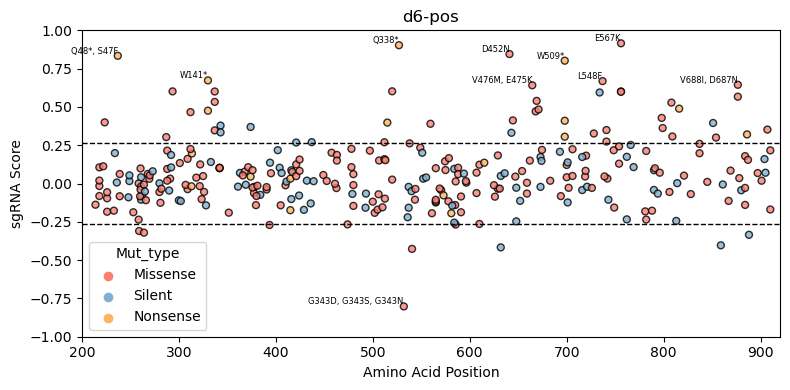

In [4]:
be_scan.plot.plot_scatterplot(df_filepath  = plot_dir + 'NZL10196_v9_comparisons.csv', # data
                              x_column     = 'Edit_site_3A1',  # name of a column in data
                              comparisons  = ['d6-pos'],       # names of a column in data, each is a graph

                              hue=True, hue_column='Mut_type', 
                              neg_ctrl=True, neg_ctrl_col='Gene', neg_ctrl_conditions=['NON-GENE'], # negative control points
                              filter=True, filter_col=['Mut_type', 'Gene'], filter_conditions=[['Nonsense', 'Missense', 'Silent'], ['DNMT3A']], # filter for only these categories
                              autoannot=True, autoannot_top=10, autoannot_label='Mut_list_all', # automatically label points
                              xlim_kws={'xmin': 200, 'xmax': None}, savefig = False, 
                              )

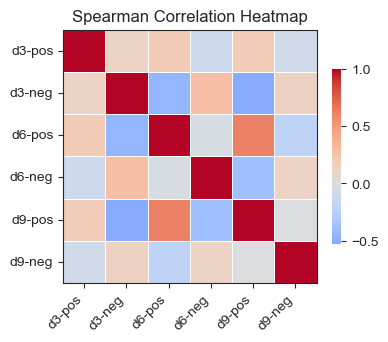

In [3]:
be_scan.plot.plot_corr_heatmap(df_filepath = plot_dir + 'NZL10196_v9_comparisons.csv', # data
                               comparisons = ['d3-pos', 'd3-neg', 'd6-pos', 'd6-neg', 'd9-pos', 'd9-neg'], # names of columns in data
                               savefig     = False,
                               )

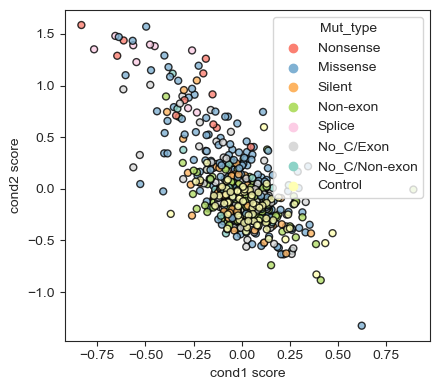

In [4]:
be_scan.plot.plot_corr_scatterplot(df_filepath = plot_dir + 'NZL10196_v9_comparisons.csv', # data
                                   condition1 = 'd3-neg', condition2 = 'd9-pos', # names of columns in data
                                   hue = True, hue_column = 'Mut_type',  # name of a column in data
                                   savefig = False,
                                   )

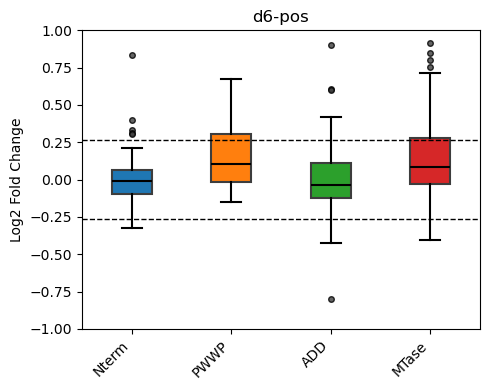

In [6]:
be_scan.plot.plot_boxes(df_filepath  = plot_dir + 'NZL10196_v9_comparisons.csv', # data
                        comparisons  = ['d6-pos'],  # name of a column in data, each column is a graph
                        plot_column = 'Domain', plot_conditions = ['PWWP', 'ADD', 'MTase', 'Nterm'], # how to split up boxes in graph

                        neg_ctrl=True, neg_ctrl_col='Gene', neg_ctrl_conditions=['NON-GENE'], 
                        filter=True, filter_col=['Win_overlap'], filter_conditions=[['Exon']], 
                        savefig = False, 
)